### 01 车牌提取
任务：
 - 将车牌从图片中提取出来

In [1]:
# 导入所需模块
import cv2
from matplotlib import pyplot as plt

# 显示图片
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

# plt显示彩色图片
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()  

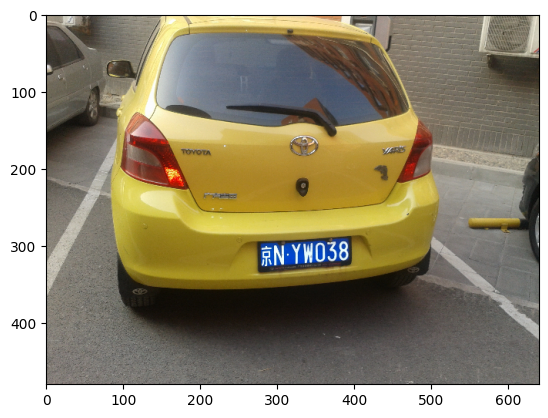

In [2]:
# 加载图片
#rawImage = cv2.imread("./image/test2.png")
rawImage = cv2.imread("test2.bmp")
plt_show0(rawImage)

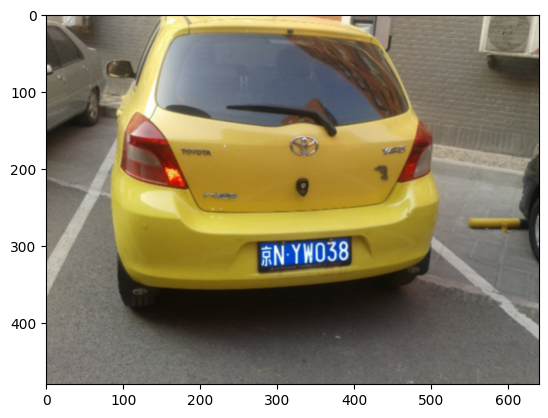

In [3]:
# 高斯去噪
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
# 预览效果
plt_show0(image)

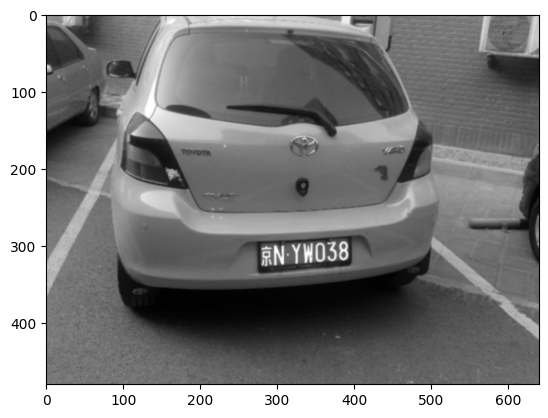

In [4]:
# 灰度处理
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

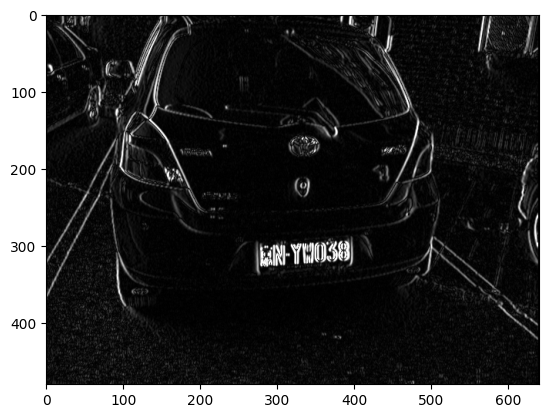

In [5]:
# sobel算子边缘检测（做了一个y方向的检测）
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
# Sobel_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(Sobel_x)  # 转回uint8
# absY = cv2.convertScaleAbs(Sobel_y)
# dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
image = absX
plt_show(image)

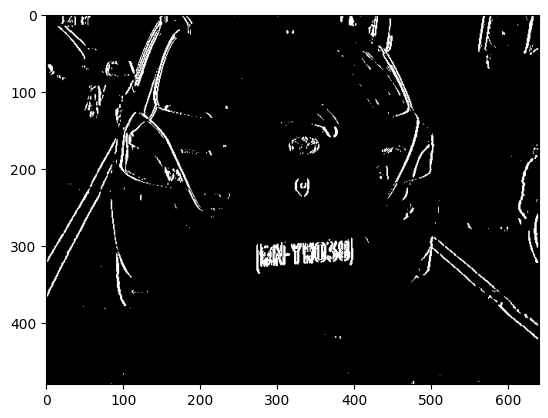

In [6]:
# 自适应阈值处理
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


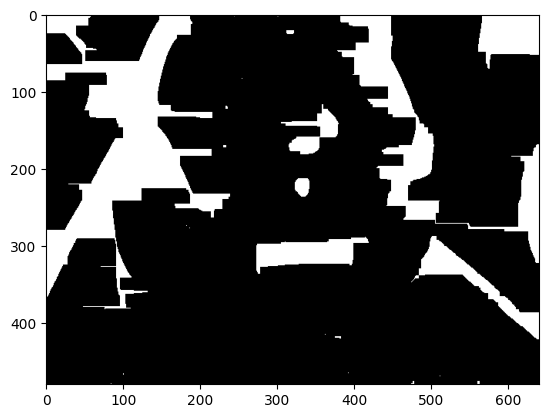

In [7]:
# 闭运算,是白色部分练成整体
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 5))
print(kernelX)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 3)
plt_show(image)

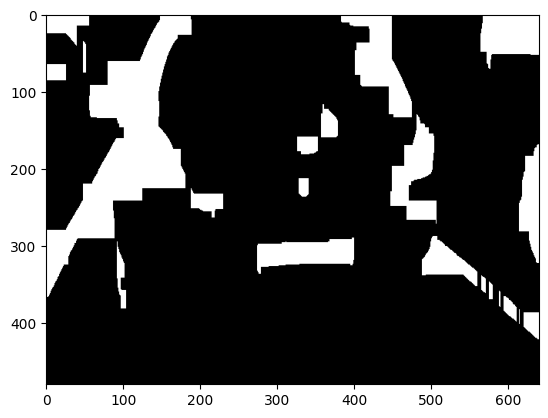

In [8]:
# 去除一些小的白点
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))

# 膨胀，腐蚀
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
# 腐蚀，膨胀
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)

plt_show(image)

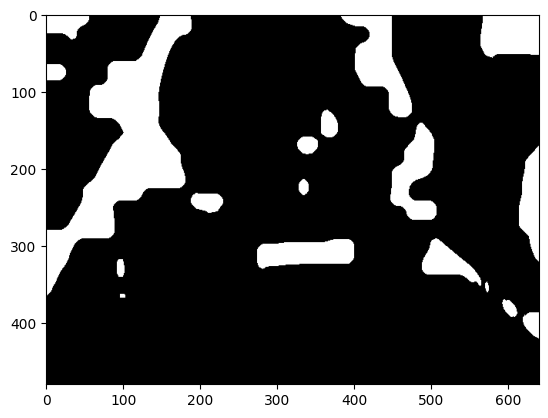

In [9]:
# 中值滤波去除噪点
image = cv2.medianBlur(image, 15)
plt_show(image)

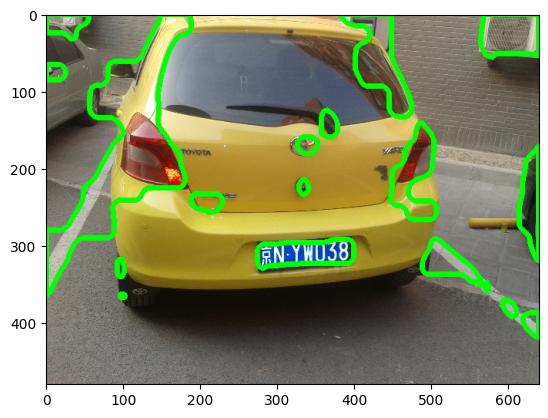

In [10]:
# 轮廓检测
# cv2.RETR_EXTERNAL表示只检测外轮廓
# cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
image1 = rawImage.copy()
cv2.drawContours(image1, contours, -1, (0, 255, 0), 5)
plt_show0(image1)

In [11]:
# 轮廓数量
len(contours)

18

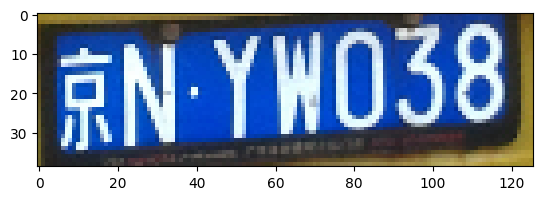

车牌提取成功！


In [12]:
# 筛选出车牌位置的轮廓
# 这里我只做了一个车牌的长宽比在3:1到4：1之间这样一个判断
for item in contours:
    # cv2.boundingRect用一个最小的矩形，把找到的形状包起来
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    # 440mm×140mm
    if (weight > (height * 2.5)) and (weight < (height * 4)):
        image = rawImage[y:y + height, x:x + weight]
#         cv_show('image',image)
        # 图像保存
        plt_show0(image)
        cv2.imwrite('./car_license/test4.png', image)
print("车牌提取成功！")